Esse notebook destina-se a análise dos dados referentes a candidaturas eleitas entre os anos de 1995 e 2019. As perguntas estabelecidas e as hipóteses a serem comprovadas foram:

1. Após a aprovação da Lei 9.504/1997 houve aumento no percentual de mulheres eleitas para o cargo de deputada federal nas 3 legislações subsequentes em comparação com o percentual existente na data de sua aprovação?
    - **Hipótese:** Não houve aumento no percentual de mulheres eleitas para o cargo de deputada federal nas 3 legislações subsequentes em comparação com o percentual existente na data de sua aprovação da Lei 9.504/1997.
2. Após a aprovação da Lei 12.034/2009 houve aumento no percentual de mulheres eleitas para o cargo de deputada federal nas 3 legislações subsequentes em comparação com o percentual existente na data de sua aprovação?
    - **Hipótese:** Sim, houve aumento no percentual de mulheres eleitas para o cargo de deputada federal nas 3 legislações subsequentes em comparação com o percentual existente na data de sua aprovação da Lei 12.034/2009. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## 1. Após a aprovação da Lei 9.504/1997 houve aumento no percentual de mulheres eleitas para o cargo de deputada federal nas 3 legislações subsequentes em comparação com o percentual existente na data de sua aprovação?
**Hipótese:** Não houve aumento no percentual de mulheres eleitas para o cargo de deputada federal nas 3 legislações subsequentes em comparação com o percentual existente na data de sua aprovação da Lei 9.504/1997.

In [3]:
df_legislaturas = pd.read_csv('../dados/legislaturas_1934_2023.csv')

In [5]:
df_legislaturas.head()

,id,uri,dataInicio,dataFim
0,56,https://dadosabertos.camara.leg.br/api/v2/legi...,2019-02-01,2023-01-31
1,55,https://dadosabertos.camara.leg.br/api/v2/legi...,2015-02-01,2019-01-31
2,54,https://dadosabertos.camara.leg.br/api/v2/legi...,2011-02-01,2015-01-31
3,53,https://dadosabertos.camara.leg.br/api/v2/legi...,2007-02-01,2011-01-31
4,52,https://dadosabertos.camara.leg.br/api/v2/legi...,2003-02-01,2007-01-31


Restringe os dados a serem analisados para o período a ser analisado (1995 a 2007).

In [6]:
legislaturas_h1 = df_legislaturas[(df_legislaturas['id'] >= 50) & (df_legislaturas['id'] <= 53)]['id'].unique().tolist()

In [7]:
df_candidaturas_eleitas = pd.read_csv('../dados/candidaturas_eleitas.csv')

In [8]:
df_candidaturas_eleitas_h1 = df_candidaturas_eleitas[df_candidaturas_eleitas['idLegislatura'].isin(legislaturas_h1)].copy()

In [9]:
df_candidaturas_eleitas_h1['idLegislatura'].unique()

array([53, 52, 51, 50])

Agrupa os dados por sexo 

In [11]:
agrupa_sexo = df_candidaturas_eleitas_h1.groupby(['idLegislatura', 'sexo']).size().to_frame('valorAbsoluto')

Estabelece porcentagem de cada categoria em relação ao total de candidaturas eleitas

In [15]:
agrupa_sexo['porcentagem'] = round(agrupa_sexo['valorAbsoluto'].div(agrupa_sexo.groupby('idLegislatura')['valorAbsoluto'].transform('sum')).mul(100), 2)

In [16]:
agrupa_sexo_df = agrupa_sexo.reset_index()

In [17]:
agrupa_sexo_df

,idLegislatura,sexo,valorAbsoluto,porcentagem
0,50,F,42,6.61
1,50,M,593,93.39
2,51,F,39,6.07
3,51,M,603,93.93
4,52,F,52,8.27
5,52,M,577,91.73
6,53,F,52,8.05
7,53,M,594,91.95


Prepara os dados para visualização em plano cartesiano

In [18]:
mulher_h1 = agrupa_sexo_df[agrupa_sexo_df['sexo'] == 'F']['porcentagem'].tolist()
homem_h1 = agrupa_sexo_df[agrupa_sexo_df['sexo'] == 'M']['porcentagem'].tolist()

In [19]:
legislaturas_lista_h1 = agrupa_sexo_df['idLegislatura'].unique()

Substituimos o valor ordinal das legislaturas pelo ano de início para facilitar a compreensão do gráfico.

In [20]:
legislaturas_lista_h1 = ['1995', '1999', '2003', '2007']

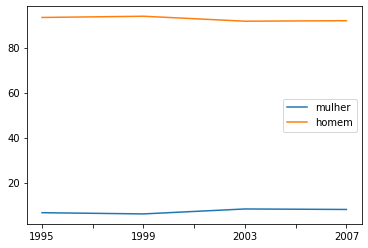

In [21]:
agrupa_sexo_df2 = pd.DataFrame({'mulher': mulher_h1,
                               'homem': homem_h1
                               }, index=legislaturas_lista_h1,
                              )
agrupa_sexo_df2.plot.line()
agrupa_sexo_df2.to_csv('../dados/analise_genero_1995_2007.csv')

Para melhor visualizar as variações, estabelecemos gráficos para cada gênero.

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

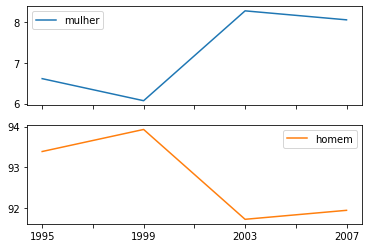

In [22]:
agrupa_sexo_df2.plot.line(subplots=True)

In [23]:
diferenca_percentual_mulher_h1_total = mulher_h1[-1] - mulher_h1[0]

In [24]:
print(f'''
Pergunta: Após a aprovação da Lei 9.504/1997 houve aumento no percentual de mulheres eleitas para o cargo de deputada federal nas 
3 legislações subsequentes em comparação com o percentual existente na data de sua aprovação? \n 
Resposta: Houve aumento de  {round(diferenca_percentual_mulher_h1_total, 2)}% no total de mulheres deputadas entre 1995 e 2007.
''')


Pergunta: Após a aprovação da Lei 9.504/1997 houve aumento no percentual de mulheres eleitas para o cargo de deputada federal nas 
3 legislações subsequentes em comparação com o percentual existente na data de sua aprovação? 
 
Resposta: Houve aumento de  1.44% no total de mulheres deputadas entre 1995 e 2007.



## 2. Após a aprovação da Lei 12.034/2009 houve aumento no percentual de mulheres eleitas para o cargo de deputada federal nas 3 legislações subsequentes em comparação com o percentual existente na data de sua aprovação?
**Hipótese:** Sim, houve aumento no percentual de mulheres eleitas para o cargo de deputada federal nas 3 legislações subsequentes em comparação com o percentual existente na data de sua aprovação da Lei 12.034/2009.

Restringe os dados a serem analisados para o período a ser analisado (2007 a 2019).

In [29]:
legislaturas_h2 = df_legislaturas[(df_legislaturas['id'] >= 53) & (df_legislaturas['id'] <= 56)]['id'].unique().tolist()

In [30]:
df_candidaturas_eleitas_h2 = df_candidaturas_eleitas[df_candidaturas_eleitas['idLegislatura'].isin(legislaturas_h2)].copy()

In [31]:
df_candidaturas_eleitas_h2['idLegislatura'].unique()

array([56, 55, 54, 53])

Agrua os dados por sexo

In [32]:
agrupa_sexo_h2 = df_candidaturas_eleitas_h2.groupby(['idLegislatura', 'sexo']).size().to_frame('valorAbsoluto')

Estabelece porcentagem de cada categoria em relação ao total de candidaturas eleitas

In [36]:
agrupa_sexo_h2['porcentagem'] = round(agrupa_sexo_h2['valorAbsoluto'].div(agrupa_sexo_h2.groupby('idLegislatura')['valorAbsoluto'].transform('sum')).mul(100), 2)

In [37]:
agrupa_sexo_h2_df = agrupa_sexo_h2.reset_index()

Prepara os dados para visualização em plano cartesiano

In [38]:
mulher_h2 = agrupa_sexo_h2_df[agrupa_sexo_h2_df['sexo'] == 'F']['porcentagem'].tolist()
homem_h2 = agrupa_sexo_h2_df[agrupa_sexo_h2_df['sexo'] == 'M']['porcentagem'].tolist()

In [39]:
legislaturas_lista_h2 = agrupa_sexo_h2_df['idLegislatura'].unique()

Substituimos o valor ordinal das legislaturas pelo ano de início para facilitar a compreensão do gráfico.

In [40]:
legislaturas_lista_h2 = ['2007', '2011', '2015', '2019']

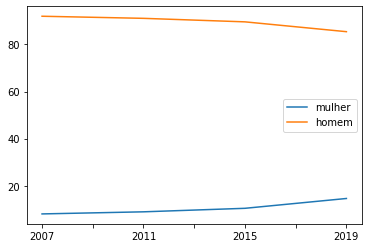

In [41]:
agrupa_sexo_h2_df2 = pd.DataFrame({'mulher': mulher_h2,
                               'homem': homem_h2
                               }, index=legislaturas_lista_h2,
                              )
agrupa_sexo_h2_df2.plot.line()
agrupa_sexo_h2_df2.to_csv('../dados/analise_genero_2007_2019.csv')

Para melhor visualizar as variações, estabelecemos gráficos para cada gênero.

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

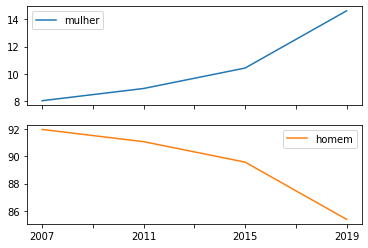

In [42]:
agrupa_sexo_h2_df2.plot.line(subplots=True)

In [43]:
diferenca_percentual_mulher_h2_total = mulher_h2[-1] - mulher_h2[0]

In [44]:
print(f'''
Pergunta: Após a aprovação da Lei 9.504/1997 houve aumento no percentual de mulheres eleitas para o cargo de deputada federal nas 
3 legislações subsequentes em comparação com o percentual existente na data de sua aprovação? \n 
Resposta: Houve aumento de  {round(diferenca_percentual_mulher_h2_total, 2)}% no total de mulheres deputadas entre 2007 e 2019.
''')


Pergunta: Após a aprovação da Lei 9.504/1997 houve aumento no percentual de mulheres eleitas para o cargo de deputada federal nas 
3 legislações subsequentes em comparação com o percentual existente na data de sua aprovação? 
 
Resposta: Houve aumento de  6.55% no total de mulheres deputadas entre 2007 e 2019.

